## Infringement detection on Airbnb

We analyze the Airbnb listings of three European metropolitan areas (Stockholm, Rome, Barcelona) and examine the extent to which applicable laws are complied with. Based on our findings, we create a model that classifies listings into different categories.

Data used in this project is taken from [Inside Airbnb](http://insideairbnb.com/get-the-data/). 

Some additional data is collected by a webscraper.

### About Airbnb

Airbnb is an American company operating an online marketplace for short-term homestays and experiences. 

It started as a more evolved version of couch surfing, in which youthful travellers used social media to find a free place to crash. Couch surfing was predicated on personal exchange: hosts got to know their guests, with the understanding that one day they might spend a free night at their guests’ home. Airbnb introduced the notion of hosts charging an affordable rate for that place to crash, so that a tourist on a budget could book a bed in the spare room of a local’s home.

The conceit of friendly locals renting out spare rooms has been supplanted by a more mercenary model, in which centuries-old apartment buildings are hollowed out with ersatz hotel rooms. Many properties have been bought specifically as short-term-rental investments, managed by agencies that have dozens of such properties.

The company acts as a broker and charges a commission from each booking. Both private and commercial landlords rent out accommodations under the mediation of the company, but without Airbnb assuming any legal obligations. 

From its founding in 2008 to March 2020, more than 900 million overnight stays were booked through Airbnb, according to the company.

### Criticism of Airbnb

Airbnb has come under criticism for a number of reasons, including the fact that:
- The mass subletting of housing at high prices for short stays is putting further pressure on the already tight housing market in some cities. Housing is becoming scarcer, rents are rising.
- Fewer taxes are being collected through tourism.
- Municipalities are losing control over the amount of tourism. 
- Residents are annoyed by the many strangers coming in and out of their homes. 

### Hypotheses

- commercial hosts tend to have several properties
- commercial hosts tend to rent out for (almost) the entire year
- 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bcn_orginal = pd.read_csv('../data/listings_bcn.csv')
scraped = pd.read_csv('../data/airbnb2.csv')

In [3]:
scraped.rename(columns = {'url':'listing_url'}, inplace = True)

In [4]:
bcn_new=bcn_orginal.merge(scraped, on='listing_url', how='outer')

In [5]:
bcn_new = bcn_new.drop(['Unnamed: 0'], axis=1)

In [6]:
bcn_new['host_id'].nunique()

6227

In [7]:
bcn_new['host_name'].nunique()

3076

In [8]:
bcn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655 entries, 0 to 15654
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15655 non-null  int64  
 1   listing_url                                   15655 non-null  object 
 2   scrape_id                                     15655 non-null  int64  
 3   last_scraped                                  15655 non-null  object 
 4   source                                        15655 non-null  object 
 5   name                                          15646 non-null  object 
 6   description                                   15569 non-null  object 
 7   neighborhood_overview                         9204 non-null   object 
 8   picture_url                                   15655 non-null  object 
 9   host_id                                       15655 non-null 

In [9]:
bcn_new.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.565500e+04,1.565500e+04,1.565500e+04,15653.000000,15653.000000,15655.000000,15655.000000,15655.000000,0.0,15098.000000,...,12089.000000,12084.000000,12090.000000,12084.000000,12085.000000,15655.000000,15655.000000,15655.000000,15655.000000,12176.000000
mean,1.823385e+17,2.023031e+13,1.450517e+08,33.219575,47.700569,41.391943,2.167214,3.484510,NaN,1.758511,...,4.581542,4.709420,4.709391,4.747661,4.467860,24.163462,21.142510,2.856404,0.084063,1.299759
std,3.126641e+17,0.000000e+00,1.555632e+08,75.886992,122.550600,0.013936,0.017259,2.172102,NaN,1.051358,...,0.518338,0.456223,0.467022,0.371416,0.537626,46.168220,45.881018,11.617766,0.789422,1.747771
min,1.867400e+04,2.023031e+13,3.073000e+03,1.000000,1.000000,41.352608,2.091590,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.891816e+07,2.023031e+13,9.171437e+06,1.000000,2.000000,41.381040,2.157340,2.000000,NaN,1.000000,...,4.440000,4.640000,4.630000,4.670000,4.310000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,3.864140e+07,2.023031e+13,7.067177e+07,6.000000,8.000000,41.389740,2.168246,3.000000,NaN,1.000000,...,4.720000,4.850000,4.850000,4.850000,4.580000,5.000000,2.000000,0.000000,0.000000,0.770000
75%,5.563748e+17,2.023031e+13,2.651478e+08,28.000000,39.000000,41.401295,2.177460,4.000000,NaN,2.000000,...,4.920000,5.000000,5.000000,5.000000,4.790000,23.000000,19.000000,1.000000,0.000000,1.900000
max,8.462300e+17,2.023031e+13,5.049885e+08,1817.000000,3639.000000,41.459560,2.227710,16.000000,NaN,20.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,241.000000,241.000000,120.000000,12.000000,47.160000


In [10]:
bcn_new.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3479
host_type                                       4201
Length: 76, dtype: int64

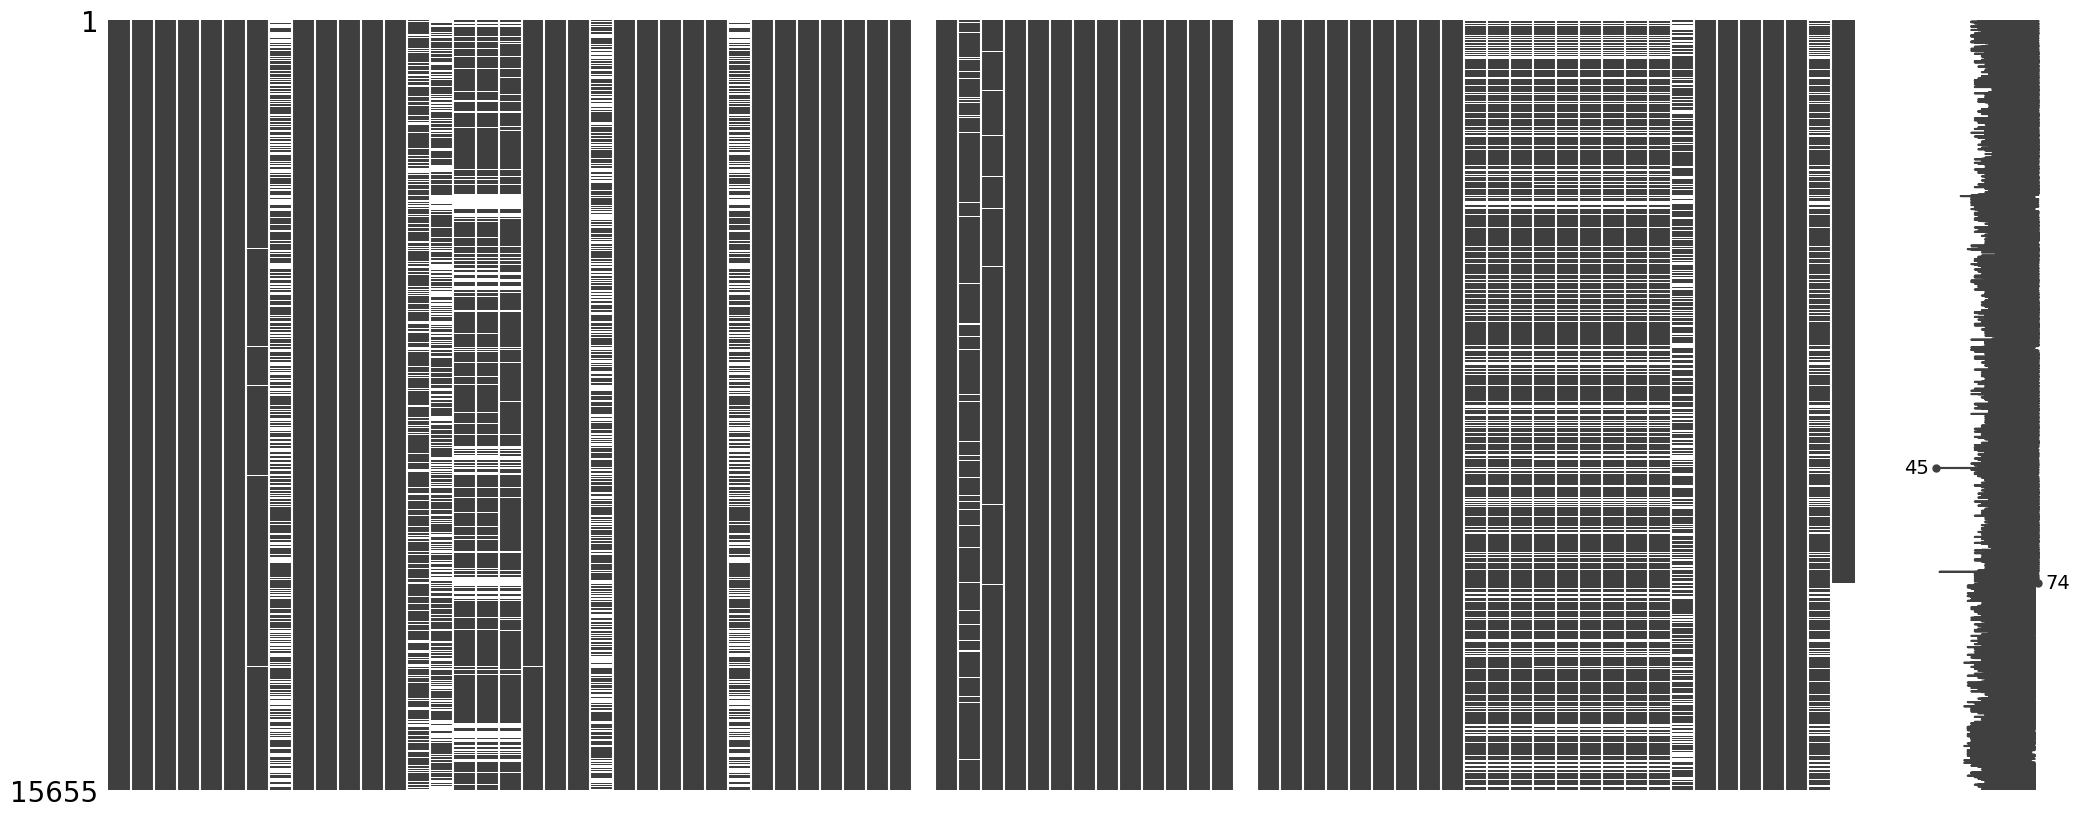

In [11]:
import missingno as msno
msno.matrix(bcn_new);

In [12]:
bcn_new['license'].isnull().sum()

4813

In [13]:
bcn_new['license'].duplicated()

0        False
1        False
2        False
3        False
4         True
         ...  
15650    False
15651     True
15652    False
15653    False
15654     True
Name: license, Length: 15655, dtype: bool

In [14]:
bcn_new.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [15]:
# drop some irrelevant or redundant colums
bcn = bcn_new.drop(['scrape_id', 'last_scraped', 'source', 'description', 'neighborhood_overview', 'picture_url', 'host_listings_count', 'host_total_listings_count', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped', 'neighbourhood',
       'neighbourhood_cleansed', ], axis=1)

In [16]:
# drop bathrooms column since it only contains NaN values
bcn = bcn.drop(['bathrooms', 'calendar_updated'], axis=1)

In [17]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_sco

In [18]:
bcn['bathrooms_text'].value_counts()

bathrooms_text
1 bath               6336
2 baths              2914
1 shared bath        2543
1 private bath       1285
1.5 baths             713
1.5 shared baths      577
2 shared baths        447
3 baths               231
2.5 baths             127
4 baths                86
2.5 shared baths       65
0 shared baths         64
3 shared baths         47
3.5 baths              28
5 baths                28
0 baths                26
Half-bath              16
11 shared baths        14
3.5 shared baths       14
6 baths                12
5 shared baths         12
4.5 baths              11
Shared half-bath       11
4 shared baths         10
5.5 baths               7
Private half-bath       4
8 baths                 3
7 shared baths          3
7.5 baths               2
5.5 shared baths        2
6 shared baths          2
10 shared baths         2
8 shared baths          1
7.5 shared baths        1
13 shared baths         1
12 shared baths         1
10 baths                1
Name: count, dtype: int

In [19]:
bcn['bathrooms_text'].isnull().sum()

8

In [20]:
bcn['price'] = bcn['price'].str[1:]

In [21]:
bcn['price'] = bcn['price'].str.replace(',','')

In [22]:
bcn['price'] = pd.to_numeric(bcn['price'])

In [23]:
bcn['price'].describe()

count    15655.000000
mean       155.644011
std        966.108173
min          0.000000
25%         50.000000
50%         99.000000
75%        164.000000
max      90000.000000
Name: price, dtype: float64

<Axes: >

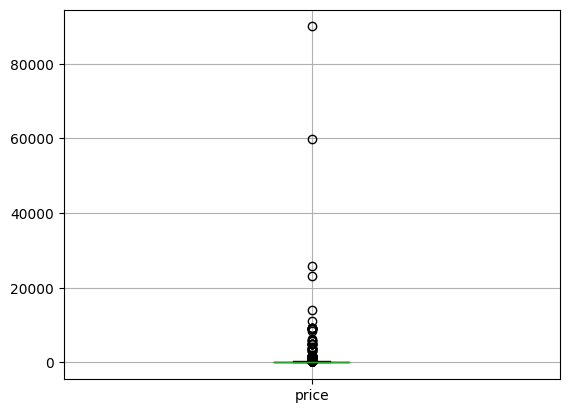

In [24]:
# check for outliers
bcn.boxplot(column='price')

In [25]:
# remove outliers with IQR method

for x in ['price']:
    q75, q25 = np.percentile(bcn.loc[:,x],[75,25])
    intr_qr = q75-q25
    maxp = q75+(1.5*intr_qr)
    minp = q25-(1.5*intr_qr)
    
    bcn.loc[bcn[x] < minp,x] = np.nan
    bcn.loc[bcn[x] > maxp,x] = np.nan
    
bcn['price'].isnull().sum()
bcn['price'] = bcn['price'].dropna(axis=0)

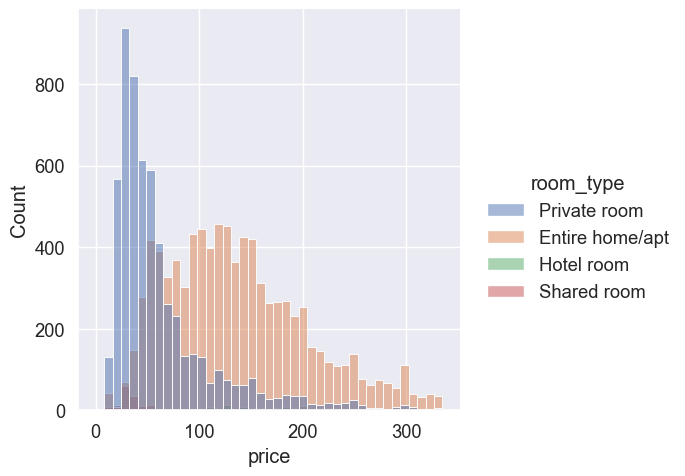

In [26]:
# plot distribution
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data=bcn, x="price", hue='room_type', kind='hist')

<Axes: ylabel='neighbourhood_group_cleansed'>

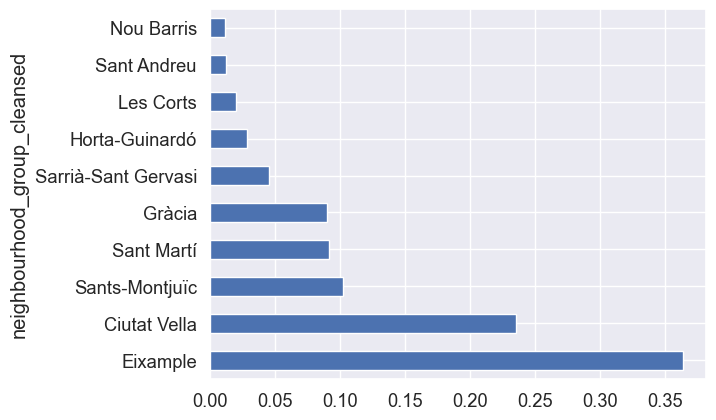

In [27]:
bcn['neighbourhood_group_cleansed'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

<Axes: ylabel='room_type'>

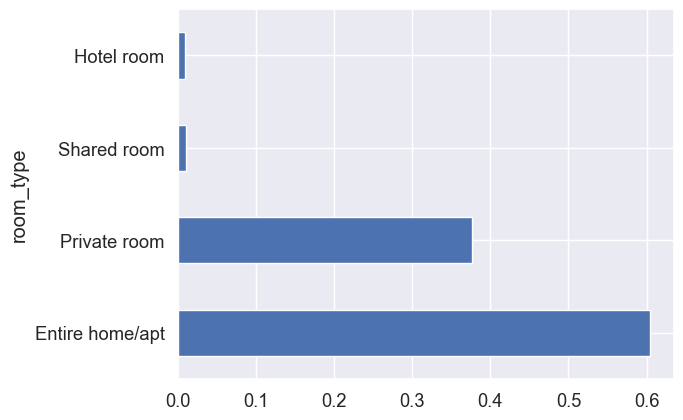

In [28]:
bcn['room_type'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [29]:
duplicate_license = bcn[bcn.duplicated('license', keep=False)].copy()
duplicate_license = duplicate_license['license'].dropna()
duplicate_license_array = duplicate_license.unique()
arr = duplicate_license_array[duplicate_license_array != 'Exempt']

In [30]:
def license_duplicates(array):
    new_arr = []
    for license in array:
        if 'HUTB' in license:
            new_arr.append(license)
        elif 'HB' in license:
            new_arr.append(license)
        elif 'AJ' in license:
            new_arr.append(license)
    return new_arr

In [31]:
license_duplicates = license_duplicates(arr)

In [32]:
bcn['license'] = bcn['license'].fillna('no license')

In [33]:
def is_valid_license(license):
    if license in license_duplicates:
        return 'reuse'
    if 'HUTB' in license:
        return 'ok'
    if 'HB' in license:
        return 'ok'
    if 'AJ' in license:
        return 'ok'
    elif 'exempt' in license.lower():
        return 'claims exempt'
    else:
        return 'no license'

In [34]:
bcn['status_license'] = bcn.apply(lambda row: is_valid_license(row['license']), axis=1)

In [35]:
def multi_listings(listings):
    if listings == 1:
        return 'single listing'
    if listings > 1 and listings < 4:
        return '2-3 listings'
    if listings > 3 and listings < 6:
        return '4-5 listings'
    if listings > 5 and listings < 10:
        return '6-9 listings'
    if listings > 9 and listings < 20:
        return '10-19 listings'
    if listings > 19 and listings < 50:
        return '20-49 listings'
    if listings > 49:
        return '50 or more listings'

In [36]:
bcn['total_listings'] = bcn.groupby('host_id')['id'].transform('size')

In [37]:
bcn['multi_listings'] = bcn.apply(lambda row: multi_listings(row['total_listings']), axis=1)

In [38]:
bcn.sort_values(by='total_listings', ascending=False)

,id,listing_url,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_type,status_license,total_listings,multi_listings
1445,548971357880414886,https://www.airbnb.com/rooms/548971357880414886,BINGIN - Three bedroom apartment with balcony ...,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,NaN,commercial,claims exempt,241,50 or more listings
3892,660000460229528902,https://www.airbnb.com/rooms/660000460229528902,ASOA - 1 bedroom apartment in Gràcia,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,NaN,commercial,no license,241,50 or more listings
9719,664988673127173894,https://www.airbnb.com/rooms/664988673127173894,ULINDI- 2 Bedroom Apartment in Eixample Esquerra,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,NaN,commercial,no license,241,50 or more listings
15185,817217544895773182,https://www.airbnb.com/rooms/817217544895773182,ANETO - 3 bedrooms apartment in Eixample Esquerra,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,NaN,NaN,no license,241,50 or more listings
10302,53125521,https://www.airbnb.com/rooms/53125521,HIDA - 2 bedroom apartment with terrace in Gràcia,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,0.07,commercial,no license,241,50 or more listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,35333897,https://www.airbnb.com/rooms/35333897,Double Room for 2pax Arc de Triomf 5 minuts Beach,258814676,https://www.airbnb.com/users/show/258814676,Noemi,2019-04-29,NaN,within an hour,95%,...,f,1,0,1,0,1.64,private,claims exempt,1,single listing
8338,8820500,https://www.airbnb.com/rooms/8820500,Light double room near riverside & shopping ce...,21500875,https://www.airbnb.com/users/show/21500875,Maria,2014-09-18,"Barcelona, Spain",within a day,83%,...,f,1,0,1,0,0.36,private,no license,1,single listing
8326,9956262,https://www.airbnb.com/rooms/9956262,My home in Barcelona - 10% discount for families!,7542275,https://www.airbnb.com/users/show/7542275,Roger,2013-07-17,"Torrebusqueta, Spain",within a few hours,100%,...,f,1,1,0,0,2.73,private,ok,1,single listing
8324,718685787948427333,https://www.airbnb.com/rooms/718685787948427333,Brand new premium apartment sunlight all day,8453669,https://www.airbnb.com/users/show/8453669,Mauro,2013-08-27,"Buenos Aires, Argentina",within an hour,100%,...,f,1,1,0,0,NaN,private,no license,1,single listing


EDA ON HOSTS

In [39]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_sco

In [40]:
hosts = bcn.groupby(['host_id', 'host_name']).agg(listings = ('id', 'count'))

In [41]:
hosts.sort_values(by='listings', ascending=False)

,,listings
host_id,host_name,
346367515,Ukio,241
32037490,SweetInn,183
4459553,AB Apartment,174
158023606,Habitat Apartments,136
299462,Stay U-Nique,128
...,...,...
35666153,Silvia,1
35625334,Maria,1
35624152,Tatiana,1


<Axes: ylabel='status_license'>

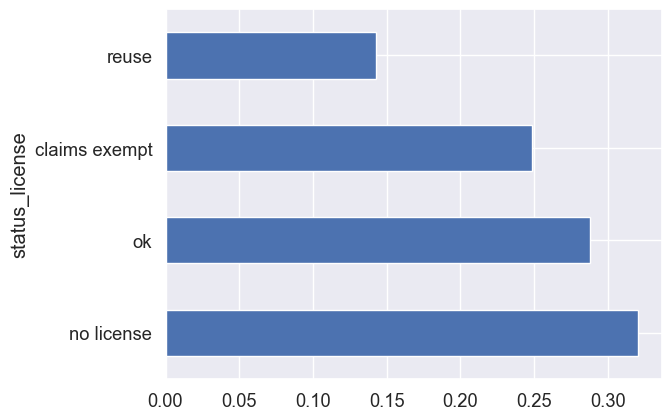

In [42]:
bcn['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

<Axes: ylabel='multi_listings'>

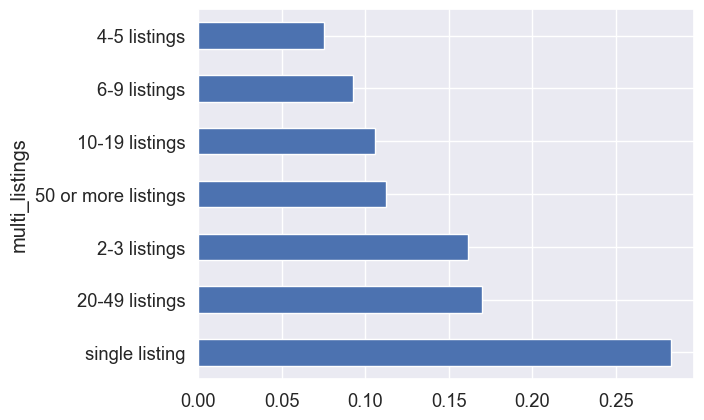

In [43]:
bcn['multi_listings'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [44]:
commercial = bcn.loc[bcn['host_type'] == 'commercial']
private = bcn.loc[bcn['host_type'] == 'private']

<Axes: ylabel='status_license'>

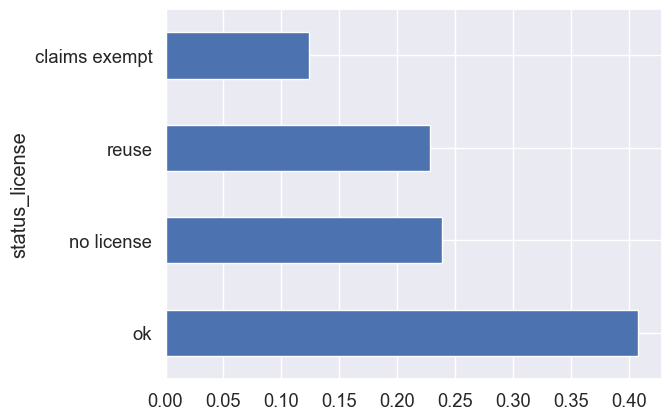

In [45]:
commercial['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

<Axes: ylabel='status_license'>

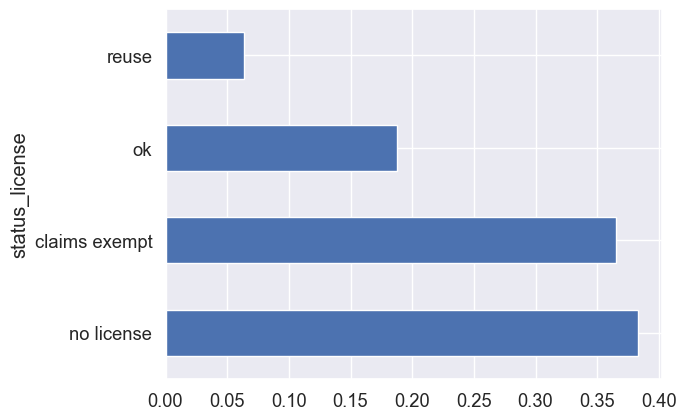

In [46]:
private['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [47]:
df_license = pd.crosstab(bcn['room_type'], bcn['host_type'], normalize='index').mul(100).round(2)
df_license.head()

host_type,commercial,not_found,private
room_type,,,
Entire home/apt,62.70,0.76,36.54
Hotel room,97.37,0.00,2.63
Private room,23.34,1.38,75.28
Shared room,69.57,2.61,27.83


In [48]:
df_license = pd.crosstab(bcn['host_type'], bcn['room_type'], normalize='index').mul(100).round(2)
df_license.head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
host_type,,,,
commercial,78.93,1.99,17.64,1.44
not_found,46.49,0.00,50.88,2.63
private,44.43,0.05,54.96,0.55


In [49]:
df_license = pd.crosstab(bcn['host_type'], bcn['multi_listings'], normalize='index').mul(100).round(2)
df_license.head()

multi_listings,10-19 listings,2-3 listings,20-49 listings,4-5 listings,50 or more listings,6-9 listings,single listing
host_type,,,,,,,
commercial,16.78,7.84,26.22,8.33,21.14,13.30,6.39
not_found,7.89,23.68,16.67,5.26,10.53,7.89,28.07
private,4.58,24.27,7.87,7.66,1.51,6.07,48.04


In [50]:
df_license = pd.crosstab(bcn['host_type'], bcn['status_license'], normalize='index').mul(100).round(2)
df_license.head()

status_license,claims exempt,no license,ok,reuse
host_type,,,,
commercial,12.42,23.91,40.79,22.88
not_found,45.61,31.58,15.79,7.02
private,36.53,38.30,18.78,6.40


In [54]:
host_types = bcn.groupby(['host_type']).agg(listings = ('id', 'count'), listings_avg = ('total_listings', 'mean'), calculated_host_listings_count = ('calculated_host_listings_count', 'mean'),calculated_host_listings_count_entire_homes = ('calculated_host_listings_count_entire_homes', 'mean'), price = ('price', 'mean'), minimum_nights = ('minimum_nights', 'mean'), number_of_reviews = ('number_of_reviews', 'mean'), rating = ('review_scores_rating', 'mean'))

In [55]:
host_types

,listings,listings_avg,calculated_host_listings_count,calculated_host_listings_count_entire_homes,price,minimum_nights,number_of_reviews,rating
host_type,,,,,,,,
commercial,5572,41.774408,41.774408,37.563173,139.243582,11.738335,41.775844,4.493726
not_found,114,18.780702,18.780702,15.947368,88.618182,14.622807,36.570175,4.490435
private,5768,6.382975,6.382975,4.338939,79.684726,17.909847,47.565534,4.570772
